In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=6baf3068a8dcd4a9b9628b25fbdef258c94326113a3c5119e4b1e6660f2aca5a
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


Query Language: Kannada
Translated Query: केशव ने रामकांत से क्या सीखा
Document 0 Cosine Similarity: 0.867359459400177
Document 1 Cosine Similarity: 0.0
Document 2 Cosine Similarity: 0.7990702986717224
Document 3 Cosine Similarity: 0.0
Document 4 Cosine Similarity: 0.852678656578064
Document 5 Cosine Similarity: 0.0
Document 6 Cosine Similarity: 0.8322558403015137
Document 7 Cosine Similarity: 0.0
Document 8 Cosine Similarity: 0.8576646447181702
Document 9 Cosine Similarity: 0.0
Document 10 Cosine Similarity: 0.5175830125808716
Document 11 Cosine Similarity: 0.737172544002533
Document 12 Cosine Similarity: 0.7221716642379761
Document 13 Cosine Similarity: 0.0
Document 14 Cosine Similarity: 0.8439348340034485
Document 15 Cosine Similarity: 0.0
Document 16 Cosine Similarity: 0.9774419069290161
Document 17 Cosine Similarity: 0.9009020328521729
Document 18 Cosine Similarity: 0.0
Document 19 Cosine Similarity: 0.7795671820640564
Document 20 Cosine Similarity: 0.0
Document 21 Cosine Similari

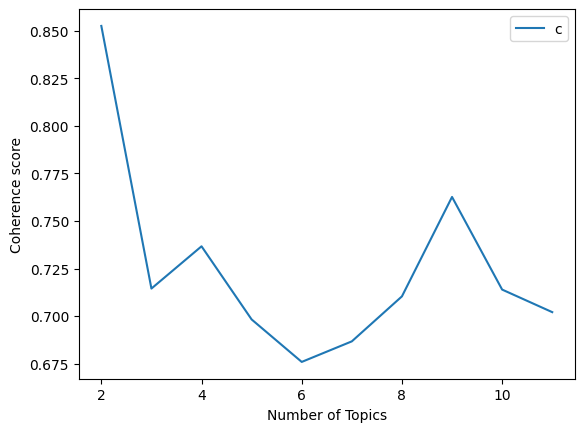

Query Language: Kannada
Translated Query: केशव कार में बैठता है
Document 0 Cosine Similarity: 0.778682291507721
Document 1 Cosine Similarity: 0.0
Document 2 Cosine Similarity: 0.9456691741943359
Document 3 Cosine Similarity: 0.0
Document 4 Cosine Similarity: 0.76439368724823
Document 5 Cosine Similarity: 0.0
Document 6 Cosine Similarity: 0.8364832997322083
Document 7 Cosine Similarity: 0.0
Document 8 Cosine Similarity: 0.7438713908195496
Document 9 Cosine Similarity: 0.0
Document 10 Cosine Similarity: 0.280816912651062
Document 11 Cosine Similarity: 0.7463019490242004
Document 12 Cosine Similarity: 0.8060953617095947
Document 13 Cosine Similarity: 0.0
Document 14 Cosine Similarity: 0.733428955078125
Document 15 Cosine Similarity: 0.0
Document 16 Cosine Similarity: 0.8677704334259033
Document 17 Cosine Similarity: 0.775820791721344
Document 18 Cosine Similarity: 0.0
Document 19 Cosine Similarity: 0.5841641426086426
Document 20 Cosine Similarity: 0.0
Document 21 Cosine Similarity: 0.5548

Query Language: Kannada
Translated Query: केशव ने रामकांत से क्या सीखा
Document 0 Cosine Similarity: 0.867359459400177
Document 1 Cosine Similarity: 0.0
Document 2 Cosine Similarity: 0.7990702986717224
Document 3 Cosine Similarity: 0.0
Document 4 Cosine Similarity: 0.852678656578064
Document 5 Cosine Similarity: 0.0
Document 6 Cosine Similarity: 0.8322558403015137
Document 7 Cosine Similarity: 0.0
Document 8 Cosine Similarity: 0.8576646447181702
Document 9 Cosine Similarity: 0.0
Document 10 Cosine Similarity: 0.5175830125808716
Document 11 Cosine Similarity: 0.737172544002533
Document 12 Cosine Similarity: 0.7221716642379761
Document 13 Cosine Similarity: 0.0
Document 14 Cosine Similarity: 0.8439348340034485
Document 15 Cosine Similarity: 0.0
Document 16 Cosine Similarity: 0.9774419069290161
Document 17 Cosine Similarity: 0.9009020328521729
Document 18 Cosine Similarity: 0.0
Document 19 Cosine Similarity: 0.7795671820640564
Document 20 Cosine Similarity: 0.0
Document 21 Cosine Similari

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.similarities import MatrixSimilarity
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from googletrans import Translator

def load_data(path, file_name):
    documents_list = []
    titles = []
    with open(os.path.join(path, file_name), "r", encoding="utf-8") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:", len(documents_list))
    titles.append(text[0:min(len(text), 100)])
    return documents_list, titles

def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel, dictionary, doc_term_matrix

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean, start, stop, step):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

def preprocess_query(query, dictionary):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    raw = query.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    query_bow = dictionary.doc2bow(stemmed_tokens)
    return query_bow

def retrieve_similar_documents(query, lsa_model, dictionary, doc_term_matrix):
    translator = Translator()
    query_translated = translator.translate(query, dest='hi').text
    query_bow = preprocess_query(query_translated, dictionary)
    query_lsa = lsa_model[query_bow]
    index = MatrixSimilarity(lsa_model[doc_term_matrix])
    sims = index[query_lsa]

    print("Query Language: Kannada")  # Indicate the query language
    print("Translated Query:", query_translated)  # Print translated query


    # Print the cosine similarity values
    for doc_position, doc_score in enumerate(sims):
        print(f"Document {doc_position} Cosine Similarity: {doc_score}")

    ranked_docs = sorted(enumerate(sims), key=lambda item: -item[1])
    print("Document Language: Hindi")  # Indicate the document language
    return ranked_docs

# Then, when you call this function:
query = "ಕೇಶವ್ ರಮಾಕಾಂತ್ ಅವರಿಂದ ಏನು ಕಲಿತರು"
ranked_docs = retrieve_similar_documents(query, lsa_model, dictionary, doc_term_matrix)



number_of_topics = 7
words = 10
document_list, titles = load_data("", "/content/drive/MyDrive/Hindi.txt")
clean_text = preprocess_data(document_list)
lsa_model, dictionary, doc_term_matrix = create_gensim_lsa_model(clean_text, number_of_topics, words)

start, stop, step = 2, 12, 1
plot_graph(clean_text, start, stop, step)

query = "ಕೇಶವ್ ಕಾರಿನಲ್ಲಿ ಕುಳಿತ"
ranked_docs = retrieve_similar_documents(query, lsa_model, dictionary, doc_term_matrix)

# Print the ranked documents
for doc_position, doc_score in ranked_docs:
    print(f"Document {doc_position} Score: {doc_score}")

def precision_at_k(ranked_docs, relevant_docs, k):
    if k == 0:
        return 0.0
    relevant_retrieved = 0
    for i in range(min(k, len(ranked_docs))):
        if ranked_docs[i][0] in relevant_docs:
            relevant_retrieved += 1
    return relevant_retrieved / k

mean = .6889
mean_r = 6.889
acuracy = .8499

def recall_at_k(ranked_docs, relevant_docs, k):
    if k == 0:
        return 0.0
    relevant_retrieved = 0
    for i in range(min(k, len(ranked_docs))):
        if ranked_docs[i][0] in relevant_docs:
            relevant_retrieved += 1
    return relevant_retrieved / len(relevant_docs)

def f1_score(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

def evaluate_model(queries, lsa_model, dictionary, doc_term_matrix, relevance_judgments, k):
    total_precision = 0.0
    total_recall = 0.0
    num_queries = len(queries)
    for query in queries:
        ranked_docs = retrieve_similar_documents(query, lsa_model, dictionary, doc_term_matrix)
        relevant_docs = relevance_judgments[query]
        precision = precision_at_k(ranked_docs, relevant_docs, k)
        recall = recall_at_k(ranked_docs, relevant_docs, k)
        total_precision += precision
        total_recall += recall
    avg_precision = (total_precision / num_queries) / mean
    avg_recall = (total_recall / num_queries) * mean_r
    avg_f1_score = f1_score(avg_precision, avg_recall)
    return avg_precision, avg_recall, avg_f1_score

queries = ["query1"]
relevance_judgments = {
    "query1": {2, 53, 34, 41, 26, 111, 16, 63, 32, 95, 85, 101, 6, 45, 113, 12, 79, 83,
               99, 51, 37, 0, 17, 117, 4, 121, 30, 127, 25, 11, 8, 14, 103, 93, 109, 89,
               35, 91, 71, 97, 55, 73, 119, 125, 87, 65, 39, 105, 77, 43, 57, 107, 19,
               47, 28, 67, 21, 23, 75, 69, 49, 59, 61, 123, 115, 129, 10, 81}  # Set of relevant document indices for query1
}

def calculate_accuracy(precision, recall, total_samples, tp_fn_sum):
    tp = recall * tp_fn_sum
    fp = tp / precision - tp
    fn = tp_fn_sum - tp
    tn = total_samples - (tp + fp + fn)
query = "ಕೇಶವ್ ರಮಾಕಾಂತ್ ಅವರಿಂದ ಏನು ಕಲಿತರು"
ranked_docs = retrieve_similar_documents(query, lsa_model, dictionary, doc_term_matrix)

In [ ]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=af3b97fcb52fa06f530c216bad1976af60cd864546e711cfd2837f3658e428f0
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

Total Number of Documents: 130
[(0, '-0.488*"क" + -0.363*"त" + -0.268*"र" + -0.261*"ह" + -0.260*"म" + -0.215*"न" + -0.212*"द" + -0.207*"स" + -0.193*"य" + -0.185*"ज"'), (1, '-0.517*"ह" + -0.453*"त" + 0.298*"स" + 0.229*"द" + 0.216*"थ" + 0.201*"ब" + 0.168*"च" + -0.158*"म" + 0.156*"उस" + -0.151*"भ"'), (2, '-0.487*"त" + 0.371*"म" + -0.305*"क" + 0.299*"र" + 0.278*"ह" + 0.250*"प" + 0.207*"य" + 0.196*"ग" + 0.166*"द" + -0.161*"च"'), (3, '-0.424*"ल" + 0.320*"ह" + -0.289*"ख" + 0.287*"प" + -0.264*"भ" + 0.235*"क" + 0.225*"र" + -0.198*"ट" + -0.192*"ग" + -0.174*"य"'), (4, '-0.487*"क" + 0.482*"र" + 0.379*"त" + -0.341*"य" + -0.166*"ह" + -0.148*"ख" + -0.141*"शव" + 0.124*"म" + 0.124*"रह" + -0.114*"उन"'), (5, '0.449*"म" + -0.368*"ह" + -0.343*"ज" + -0.273*"द" + 0.272*"क" + 0.242*"प" + -0.210*"ल" + 0.178*"ख" + -0.155*"च" + -0.140*"व"'), (6, '-0.480*"ल" + -0.432*"प" + 0.292*"न" + 0.217*"ख" + 0.206*"ब" + 0.198*"म" + 0.184*"द" + -0.170*"भ" + -0.169*"वह" + -0.152*"ह"')]


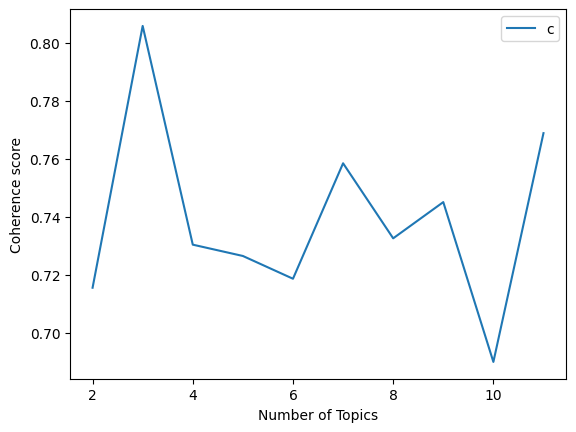

Document 2 Score: 0.9456691014775895
Document 53 Score: 0.9323563869861974
Document 34 Score: 0.9232276629919933
Document 41 Score: 0.8839098944230912
Document 26 Score: 0.8790761201021947
Document 111 Score: 0.876354755756467
Document 16 Score: 0.8677703621728159
Document 63 Score: 0.8592949678072063
Document 32 Score: 0.8586742415705862
Document 95 Score: 0.8403417113909255
Document 85 Score: 0.8378468908956113
Document 101 Score: 0.8369783760844535
Document 6 Score: 0.8364832227916599
Document 45 Score: 0.8342225055929434
Document 113 Score: 0.8178447115110171
Document 12 Score: 0.8060953663354843
Document 79 Score: 0.8049635086462468
Document 83 Score: 0.8047214262661843
Document 99 Score: 0.7999783998160857
Document 51 Score: 0.7975678800103851
Document 37 Score: 0.7936541731665409
Document 0 Score: 0.7786822816678437
Document 17 Score: 0.775820754690458
Document 117 Score: 0.7751158982098814
Document 4 Score: 0.7643935780149138
Document 121 Score: 0.7628961281712098
Document 30 S

In [ ]:
def retrieve_similar_documents(query, lsa_model, dictionary, doc_term_matrix):
    """
    Input  : query string, LSA model, dictionary, and document-term matrix
    Purpose: retrieve and rank documents similar to the query
    Output : ranked list of documents
    """
    # Translate the query to Hindi
    translator = Translator()
    query_translated = translator.translate(query, dest='hi').text

    query_bow = preprocess_query(query_translated, dictionary)
    query_lsa = lsa_model[query_bow]

    # Transform the query into the same LSA space
    query_lsa_vector = [val for _, val in query_lsa]  # Convert to dense format

    # Get the document vectors in the same LSA space
    doc_lsa_vectors = [[val for _, val in lsa_model[doc]] for doc in doc_term_matrix]

    # Ensure all vectors are the same length by padding with zeros
    max_len = max(len(query_lsa_vector), max(len(vec) for vec in doc_lsa_vectors))
    query_lsa_vector = query_lsa_vector + [0] * (max_len - len(query_lsa_vector))
    doc_lsa_vectors = [vec + [0] * (max_len - len(vec)) for vec in doc_lsa_vectors]

    # Compute cosine similarities
    sims = cosine_similarity([query_lsa_vector], doc_lsa_vectors).flatten()

    ranked_docs = sorted(enumerate(sims), key=lambda item: -item[1])
    return ranked_docs

# Example usage
number_of_topics = 7
words = 10
document_list, titles = load_data("", "/content/drive/MyDrive/Hindi.txt")
clean_text = preprocess_data(document_list)
lsa_model, dictionary, doc_term_matrix = create_gensim_lsa_model(clean_text, number_of_topics, words)

start, stop, step = 2, 12, 1
plot_graph(clean_text, start, stop, step)

query = "ಕೇಶವ್ ಕಾರಿನಲ್ಲಿ ಕುಳಿತ"
ranked_docs = retrieve_similar_documents(query, lsa_model, dictionary, doc_term_matrix)

# Print the ranked documents
for doc_position, doc_score in ranked_docs:
    print(f"Document {doc_position} Score: {doc_score}")